In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

---

##  1 ) Using a dataset for public repository

### Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.

source: [Computer Hardware Data Set].(https://archive.ics.uci.edu/ml/datasets/Computer+Hardware)


---

## 2 )  Load Dataset into `cpu_data`

In [2]:
# Loading the dataset into a dataframe
cpu_data = pd.read_csv("../DataSet/machine.data", low_memory=False)

In [3]:
cpu_data.head()

,VENDOR,MODEL,CYCLE_TIME,MINIMUM_MAIN_MEMORY,MAXIMUM_MAIN_MEMORY,CACHE_MEMORY,MINIMUM_CHANNELS,MAXIMUM_CHANNELS,PUBLISHED_RELATIVE_PERFORMANCE,ESTIMATED_RELATIVE_PERFORMANCE
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


---

## 3 )  Data Dimensions

`Number of Instances: 209`

`Number of Fields: 10`

In [4]:
cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   VENDOR                          209 non-null    object
 1   MODEL                           209 non-null    object
 2   CYCLE_TIME                      209 non-null    int64 
 3   MINIMUM_MAIN_MEMORY             209 non-null    int64 
 4   MAXIMUM_MAIN_MEMORY             209 non-null    int64 
 5   CACHE_MEMORY                    209 non-null    int64 
 6   MINIMUM_CHANNELS                209 non-null    int64 
 7   MAXIMUM_CHANNELS                209 non-null    int64 
 8   PUBLISHED_RELATIVE_PERFORMANCE  209 non-null    int64 
 9   ESTIMATED_RELATIVE_PERFORMANCE  209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


---

## 4) Data types available in the dataset

|FIELD NAME|VALUE TYPE|UNIT|DATA TYPE|
| - | - | - | - |
|VENDOR|Alpha|Text|QUALITATIVE - Nominal|
|MODEL|Alpha|Text|QUALITATIVE - Nominal|
|CYCLE_TIME|integer|nanoseconds|QUANTITATIVE - Continuous|
|MINIMUM_MAIN_MEMORY|integer|kilobytes|QUANTITATIVE - Continuous|
|MAXIMUM_MAIN_MEMORY|integer|kilobytes|QUANTITATIVE - Continuous|
|CACHE_MEMORY|integer|kilobytes|QUANTITATIVE - Continuous|
|MINIMUM_CHANNELS|integer|units|QUANTITATIVE - Continuous|
|MAXIMUM_CHANNELS|integer|units|QUANTITATIVE - Continuous|
|PUBLISHED_RELATIVE_PERFORMANCE|integer|??|QUANTITATIVE - Continuous|
|ESTIMATED_RELATIVE_PERFORMANCE|integer|??|QUANTITATIVE - Continuous|


---

## 5 ) Missing values, duplicate entries and outliers in the data

> It looks like there is not null or none data 

In [5]:
sum(cpu_data["MINIMUM_MAIN_MEMORY"].isnull())

0

> Double checking for null or none just for fun ...

In [6]:
cpu_data.isna().sum()


VENDOR                            0
MODEL                             0
CYCLE_TIME                        0
MINIMUM_MAIN_MEMORY               0
MAXIMUM_MAIN_MEMORY               0
CACHE_MEMORY                      0
MINIMUM_CHANNELS                  0
MAXIMUM_CHANNELS                  0
PUBLISHED_RELATIVE_PERFORMANCE    0
ESTIMATED_RELATIVE_PERFORMANCE    0
dtype: int64

> looking for Duplicates ...

In [7]:
cpu_data.duplicated().sum()

0

---

## 6 )  Descriptive statistics of Data Set

In [8]:
cpu_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CYCLE_TIME,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MINIMUM_MAIN_MEMORY,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MAXIMUM_MAIN_MEMORY,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACHE_MEMORY,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
MINIMUM_CHANNELS,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
MAXIMUM_CHANNELS,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PUBLISHED_RELATIVE_PERFORMANCE,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ESTIMATED_RELATIVE_PERFORMANCE,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


---

## 7 ) Overview of the distribution of those variables, which are quantitative continuous

#### I am starting with Cycle Time ( Plotting all the data .. no filter nor groups )

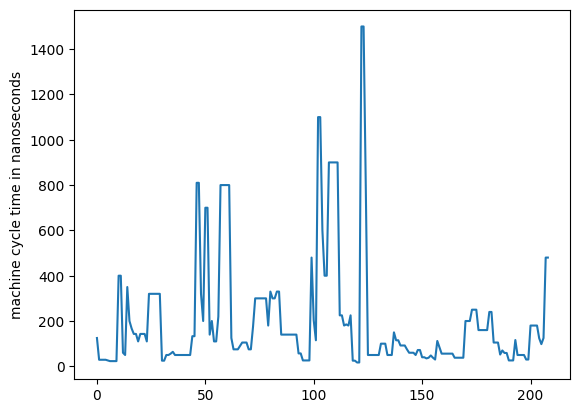

In [9]:
plt.plot(cpu_data["CYCLE_TIME"])
plt.ylabel('machine cycle time in nanoseconds')
plt.show()

#### Groping by  VENDOR  and plooting per Model

> I am taking `siemens` and `ibm` as example

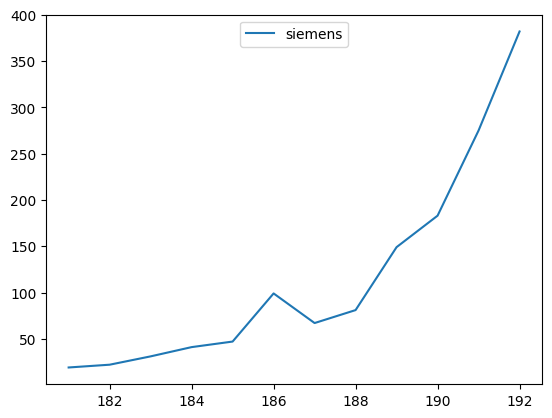

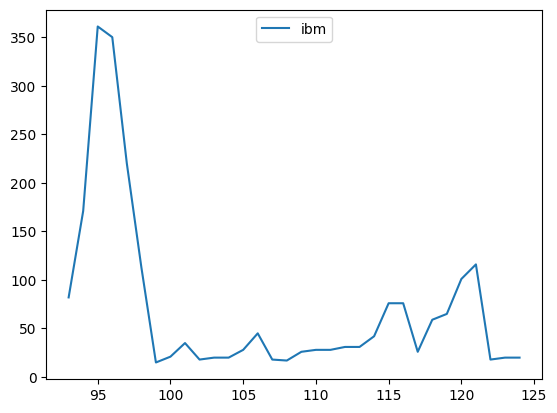

In [10]:
vendors = ['siemens', 'ibm']
for iter in vendors:
    fig, ax = plt.subplots()
    df = cpu_data[cpu_data["VENDOR"] ==  iter ]
    ax.plot(df["ESTIMATED_RELATIVE_PERFORMANCE"],label=iter)
    ax.legend(loc='upper center')
plt.show()

## 8 ) Looking for better ways to show qualitative data 

> Count of Vendors 

<AxesSubplot:>

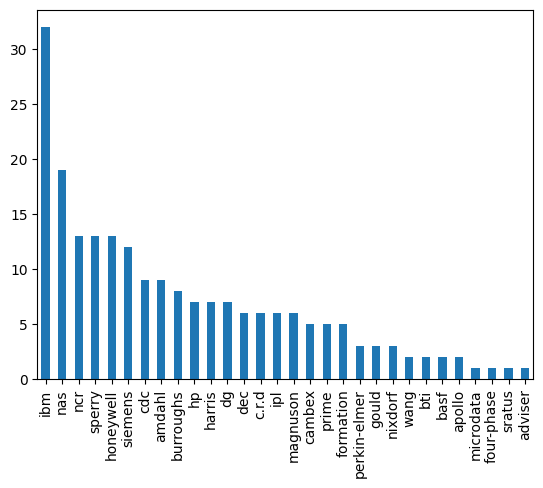

In [11]:
fig, ax = plt.subplots()
cpu_data['VENDOR'].value_counts().plot(ax=ax,kind="bar")

#### Max  `PUBLISHED_RELATIVE_PERFORMANCE`  grouped by Vendor

<AxesSubplot:ylabel='PUBLISHED_RELATIVE_PERFORMANCE'>

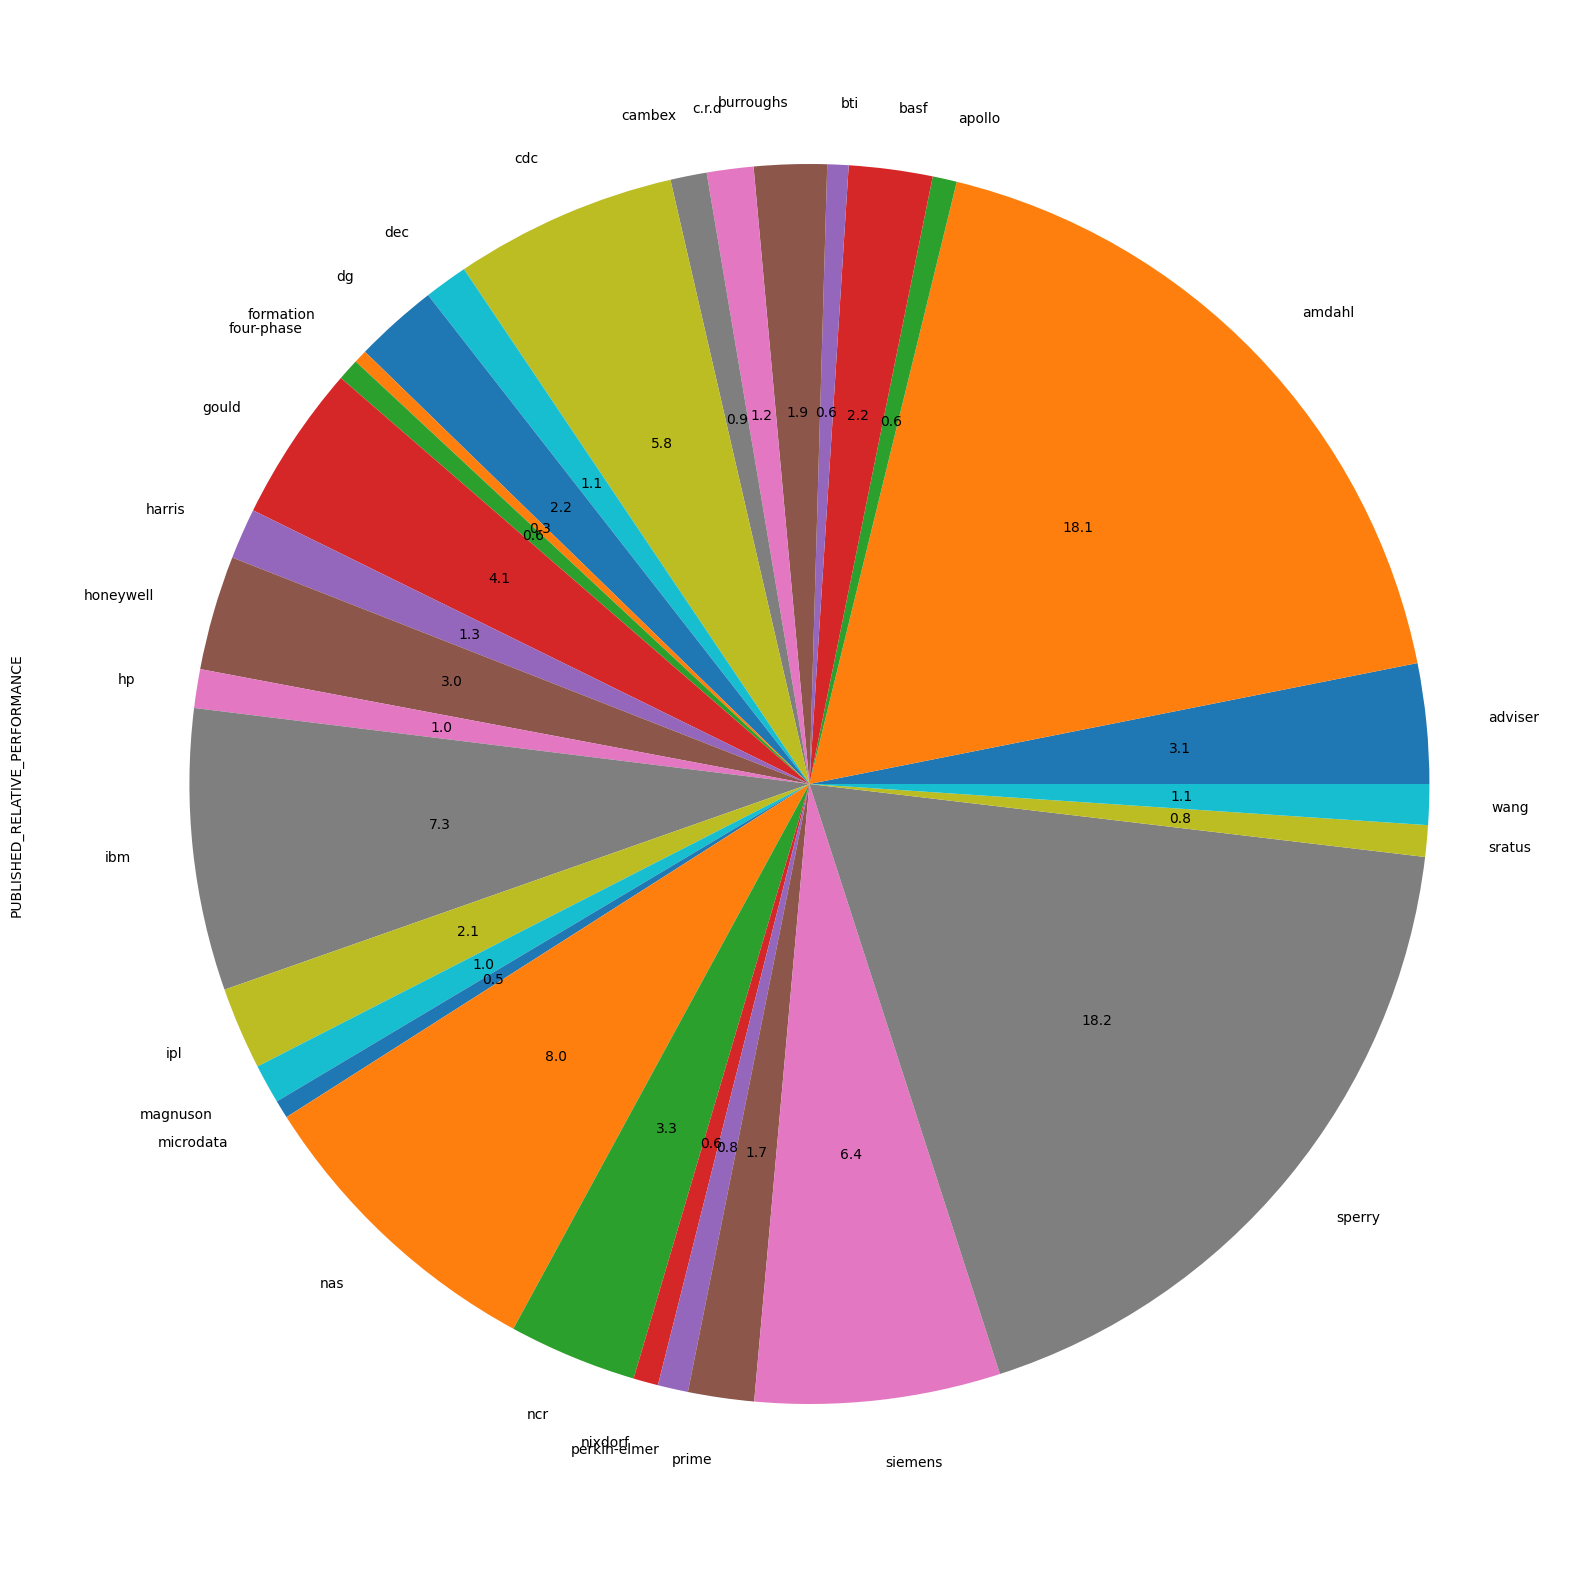

In [19]:

fig, ax = plt.subplots(figsize=(20, 25))
cpu_data.groupby(['VENDOR'])['PUBLISHED_RELATIVE_PERFORMANCE'].max().plot(ax=ax,kind="pie",autopct="%0.1f",)

<AxesSubplot:xlabel='PUBLISHED_RELATIVE_PERFORMANCE', ylabel='Count'>

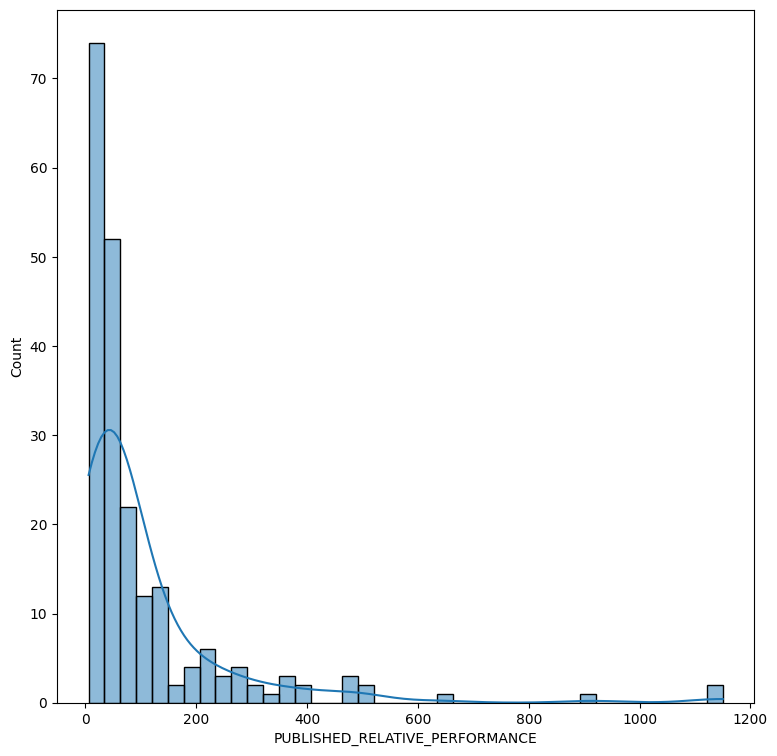

In [25]:
fig, ax = plt.subplots(figsize = (9,9))
sns.histplot(x = "PUBLISHED_RELATIVE_PERFORMANCE", data = cpu_data, kde = True)

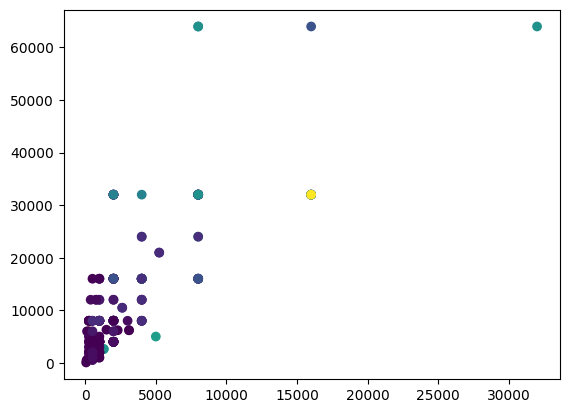

In [28]:
plt.scatter(x=cpu_data.MINIMUM_MAIN_MEMORY, y=cpu_data.MAXIMUM_MAIN_MEMORY, c=cpu_data.CACHE_MEMORY)
plt.show()